# Day 16 PCA Example: 特征脸(Eigenfaces)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


# warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo']
(200, 62, 47)


PCA(svd_solver='randomized')) 包含了一个随机方法来估计前 N 个主成分，比标准的 PCA 评估器速度更快，并且特别适用于高维数据(这里的维度将近 3000)。来看看前 150 个成分:

In [3]:
from sklearn.decomposition import PCA

pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

将这个例子中带有前面几个主成分的图像可视化(这些成分被称作“特征向量”，因此这些图像的类型通常被称作“特征脸”)

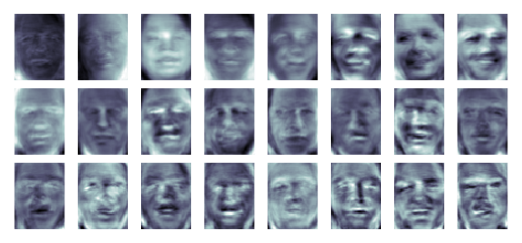

In [4]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

让我们先来观察一下图像之间的不同:前面几张特征脸(从左上角开始) 看起来和照向脸的光线角度有关，而后面的主向量似乎是挑选出了特定的特征，例如眼 睛、鼻子和嘴唇。来看看这些成分的累计方差，以及该投影保留了多少数据信息:

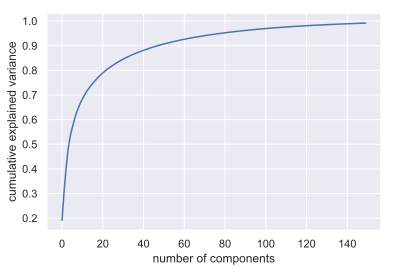

In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

可以看到，这 150 个成分包含了 90% 的方差。这使我们相信，利用这 150 个成分可以恢复 数据的大部分必要特征:

In [6]:
# 计算成分和投影的人脸
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

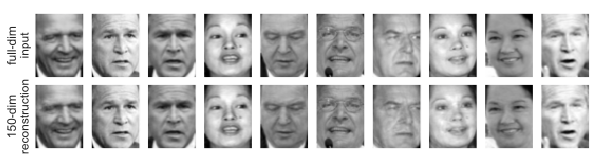

In [7]:
# 画出结果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

wow!<hr>
虽然它将数据的原始维度信息缩减了将近 20 倍，但是投影数据还是包含了足够的 信息，使我们可以通过肉眼识别出图像中的人物。这说明我们的分类算法只需要在 150 维 的数据上训练，而不需要在 3000 维的数据上训练。维度的选择取决于选定的算法，而选择合适的算法会带来更有效的分类效果。